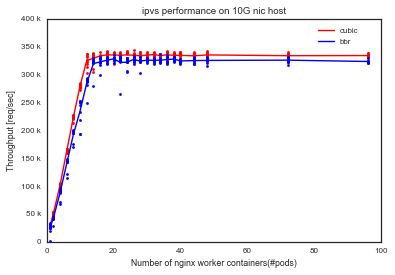

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                    print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)

d0 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

cub=dt; mcub=m

d0 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try02_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

bbr=dt; mbbr=m

ax1.plot(cub[0], mcub ,  color='r', ls='-', marker='', label='cubic')
ax1.plot(cub[0], cub[1::1].T,  color='r', ls='', marker='.')

ax1.plot(bbr[0], mbbr ,  color='b', ls='-', marker='', label='bbr')
ax1.plot(bbr[0], bbr[1::1].T,  color='b', ls='', marker='.')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax1.set_ylim(0,400000)
ax1.set_ylabel('Throughput [req/sec]')
ax1.set_xlabel('Number of nginx worker containers(#pods)')
ax1.legend(loc=(0.8,0.87))
plt.title('ipvs performance on 10G nic host')

plt.savefig('ECMP_FIGS/10G_lb.png', bbox_inches="tight", dpi=300)

plt.show()

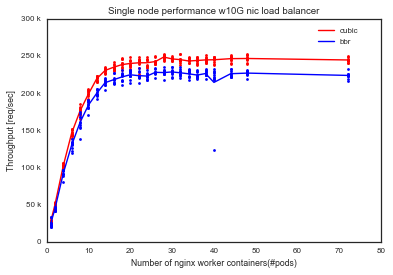

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                    print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)

d0 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try03_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

cub=dt; mcub=m

d0 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try03_bbr/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

bbr=dt; mbbr=m

ax1.plot(cub[0], mcub ,  color='r', ls='-', marker='', label='cubic')
ax1.plot(cub[0], cub[1::1].T,  color='r', ls='', marker='.')

ax1.plot(bbr[0], mbbr ,  color='b', ls='-', marker='', label='bbr')
ax1.plot(bbr[0], bbr[1::1].T,  color='b', ls='', marker='.')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax1.set_ylim(0,300000)
ax1.set_ylabel('Throughput [req/sec]')
ax1.set_xlabel('Number of nginx worker containers(#pods)')
ax1.legend(loc=(0.8,0.87))
plt.title('Single node performance w10G nic load balancer')

plt.savefig('ECMP_FIGS/10G_lb_single_node.png', bbox_inches="tight", dpi=300)

plt.show()

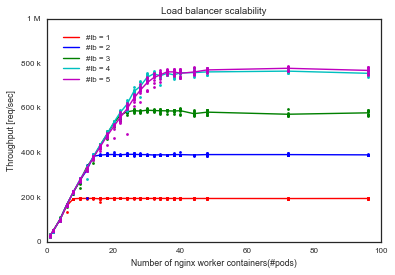

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                    print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt1=dt; m1=m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt2=dt; m2=m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt3=dt; m3=m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
#dt=np.delete(np.concatenate((d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16],0)
m=np.mean(dt[1::1], axis=0)

dt4=dt; m4=m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt5=dt; m5=m


fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)

ax1.plot(dt1[0], m1,  color='r', ls='-', marker='', label='#lb = 1')
ax1.plot(dt1[0], dt1[1::1].T,  color='r', ls='', marker='.')

ax1.plot(dt2[0], m2,  color='b', ls='-', marker='', label='#lb = 2')
ax1.plot(dt2[0], dt2[1::1].T,  color='b', ls='', marker='.')

ax1.plot(dt3[0], m3,  color='g', ls='-', marker='', label='#lb = 3')
ax1.plot(dt3[0], dt3[1::1].T,  color='g', ls='', marker='.')

ax1.plot(dt4[0], m4,  color='c', ls='-', marker='', label='#lb = 4')
ax1.plot(dt4[0], dt4[1::1].T,  color='c', ls='', marker='.')

ax1.plot(dt5[0], m5,  color='m', ls='-', marker='', label='#lb = 5')
ax1.plot(dt5[0], dt5[1::1].T,  color='m', ls='', marker='.')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax1.set_yticks(np.arange(0, 1000001, 200000))
ax1.set_ylabel('Throughput [req/sec]')
ax1.set_xlabel('Number of nginx worker containers(#pods)')
ax1.legend(loc=(0.04,0.7))
plt.title('Load balancer scalability')

plt.savefig('ECMP_FIGS/ecmp_lb_cubic.png', bbox_inches="tight", dpi=300)
plt.show()

cubic1=m1
cubic2=m2
cubic3=m3
cubic4=m4
cubic5=m5


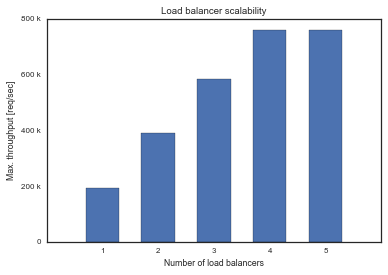

In [17]:
max= [np.mean(m1[6::1]), np.mean(m2[10::1]), np.mean(m3[16::1]), np.mean(m4[21::1]), np.mean(m4[21::1])]

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)

ax1.bar([1,2,3,4,5], max, 0.6, align='center')
ax1.set_xticks([1,2,3,4,5])
ax1.set_yticks(np.arange(0, 800001, 200000))
ax1.set_ylabel('Max. throughput [req/sec]')
ax1.set_xlabel('Number of load balancers')
plt.title('Load balancer scalability')
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.savefig('ECMP_FIGS/ecmp_lb_plateau.png', bbox_inches="tight", dpi=300)
#plt.show()

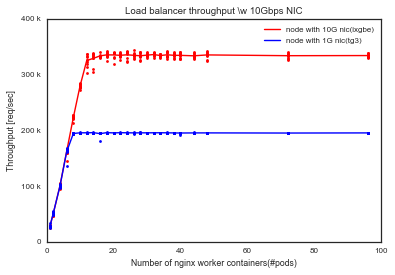

In [28]:
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)

d0 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

cb10g = dt ; mcb10g = m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

cb1=dt; mcb1=m

ax1.plot(cb10g[0], mcb10g ,  color='r', ls='-', marker='', label='node with 10G nic(ixgbe)')
ax1.plot(cb10g[0], cb10g[1::1].T,  color='r', ls='', marker='.')

ax1.plot(cb1[0], mcb1,  color='b', ls='-', marker='', label='node with 1G nic(tg3)')
ax1.plot(cb1[0], cb1[1::1].T,  color='b', ls='', marker='.')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax1.set_yticks(np.arange(0, 400001, 100000))
ax1.set_ylabel('Throughput [req/sec]')
ax1.set_xlabel('Number of nginx worker containers(#pods)')
ax1.legend()
plt.title('Load balancer throughput \w 10Gbps NIC')

plt.savefig('ECMP_FIGS/10G_ipvs.png', bbox_inches="tight", dpi=300)

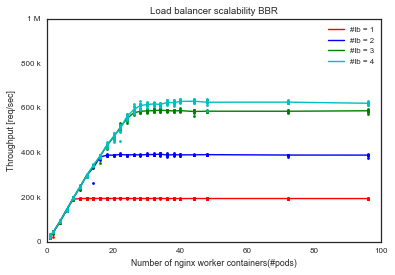

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                    print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

d0 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs1_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt1=dt; m1=m

d0 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs2_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt2=dt; m2=m

d0 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs3_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
#dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16],0)
#dt=np.delete(np.concatenate((d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16],0)
m=np.mean(dt[1::1], axis=0)

dt3=dt; m3=m

d0 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_bbr/rss_rps_rfs_xps_0_1_1_1/ipvs4_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt4=dt; m4=m

fig = plt.figure(figsize=(6, 4))
#fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

ax1.plot(dt1[0], m1,  color='r', ls='-', marker='', label='#lb = 1')
ax1.plot(dt1[0], dt1[1::1].T,  color='r', ls='', marker='.')

ax1.plot(dt2[0], m2,  color='b', ls='-', marker='', label='#lb = 2')
ax1.plot(dt2[0], dt2[1::1].T,  color='b', ls='', marker='.')

ax1.plot(dt3[0], m3,  color='g', ls='-', marker='', label='#lb = 3')
ax1.plot(dt3[0], dt3[1::1].T,  color='g', ls='', marker='.')

ax1.plot(dt4[0], m4,  color='c', ls='-', marker='', label='#lb = 4')
ax1.plot(dt4[0], dt4[1::1].T,  color='c', ls='', marker='.')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax1.set_yticks(np.arange(0, 1000001, 200000))
ax1.set_ylabel('Throughput [req/sec]')
ax1.set_xlabel('Number of nginx worker containers(#pods)')
ax1.legend()
plt.title('Load balancer scalability BBR')

plt.savefig('ECMP_FIGS/ecmp_lb_bbr.png', bbox_inches="tight", dpi=300)
plt.show()

bbr1=m1
bbr2=m2
bbr3=m3
bbr4=m4


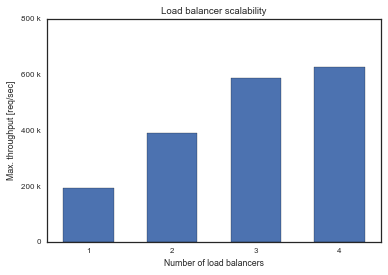

In [20]:
max= [np.mean(m1[6::1]), np.mean(m2[10::1]), np.mean(m3[16::1]), np.mean(m4[21::1])]

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)

ax1.bar([1,2,3,4], max, 0.6, align='center')
ax1.set_xticks([1,2,3,4])
ax1.set_yticks(np.arange(0, 800001, 200000))
ax1.set_ylabel('Max. throughput [req/sec]')
ax1.set_xlabel('Number of load balancers')
plt.title('Load balancer scalability')
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.savefig('ECMP_FIGS/ecmp_lb_plateau_bbr.png', bbox_inches="tight", dpi=300)
#plt.show()

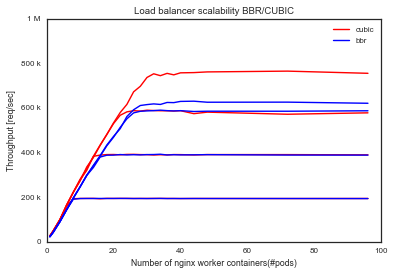

In [24]:
fig = plt.figure(figsize=(6, 4))
#fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

ax1.plot(dt1[0], cubic1,  color='r', ls='-', marker='', label='cubic')
ax1.plot(dt1[0], cubic2,  color='r', ls='-', marker='')
ax1.plot(dt1[0], cubic3,  color='r', ls='-', marker='')
ax1.plot(dt1[0], cubic4,  color='r', ls='-', marker='')
#ax1.plot(dt1[0], cubic5,  color='r', ls='-', marker='o')
ax1.plot(dt1[0], bbr1,  color='b', ls='-', marker='', label='bbr')
ax1.plot(dt1[0], bbr2,  color='b', ls='-', marker='')
ax1.plot(dt1[0], bbr3,  color='b', ls='-', marker='')
ax1.plot(dt1[0], bbr4,  color='b', ls='-', marker='')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax1.set_yticks(np.arange(0, 1000001, 200000))
ax1.set_ylabel('Throughput [req/sec]')
ax1.set_xlabel('Number of nginx worker containers(#pods)')
ax1.legend()
plt.title('Load balancer scalability BBR/CUBIC')

plt.savefig('ECMP_FIGS/ecmp_lb_bbr_vs_cubic.png', bbox_inches="tight", dpi=300)
plt.show()

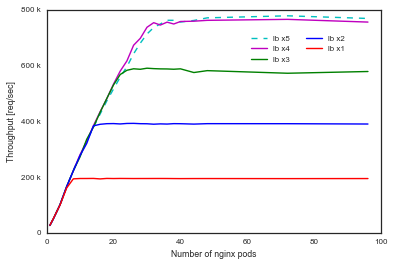

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                    print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt1=dt; m1=m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs2_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt2=dt; m2=m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs3_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt3=dt; m3=m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs4_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
#dt=np.delete(np.concatenate((d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16],0)
m=np.mean(dt[1::1], axis=0)

dt4=dt; m4=m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs5_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

dt5=dt; m5=m

cubic1=m1
cubic2=m2
cubic3=m3
cubic4=m4
cubic5=m5

fig = plt.figure(figsize=(6, 4))
#fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

ax1.plot(dt1[0], cubic5,  color='c', ls='--', marker='', label='lb x5')
ax1.plot(dt1[0], cubic4,  color='m', ls='-', marker='', label='lb x4')
ax1.plot(dt1[0], cubic3,  color='g', ls='-', marker='', label='lb x3')
ax1.plot(dt1[0], cubic2,  color='b', ls='-', marker='', label='lb x2')
ax1.plot(dt1[0], cubic1,  color='r', ls='-', marker='', label='lb x1')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax1.set_ylim(0,800000)

ax1.set_yticks(np.arange(0, 800001, 200000))
ax1.set_ylabel('Throughput [req/sec]')
ax1.set_xlabel('Number of nginx pods')
ax1.legend(loc=(0.6,0.75), ncol=2)
#plt.title('Load balancer scalability BBR/CUBIC')

plt.savefig('ECMP_FIGS/ecmp_lb_cubic_ieice.png', bbox_inches="tight", dpi=300)
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


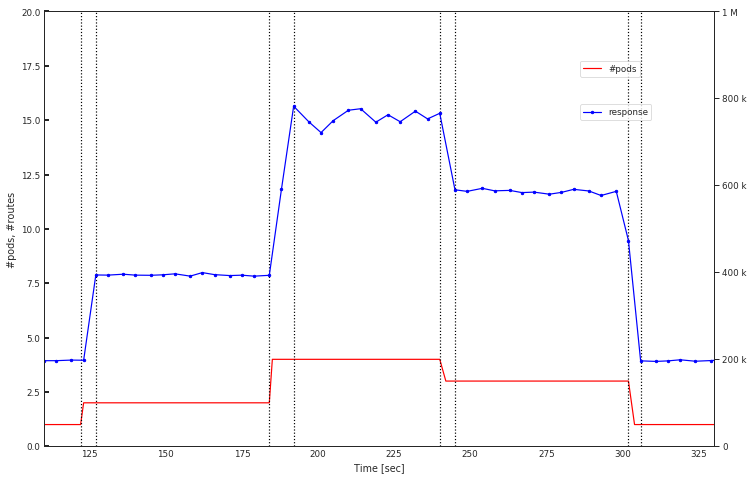

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                    print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

d0 = np.loadtxt("Try01_cubic/response_0844/lbnum.csv",usecols=(0,1,2), delimiter=',', unpack=True, skiprows=0)
d1 = np.loadtxt("Try01_cubic/response_0844/rps.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=0)


#fig = plt.figure(figsize=(6, 4))
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

ax1.plot(d0[0]-d0[0][0], d0[1],  color='r', ls='-', marker='', label='#pods')
ax1.legend(loc=(0.8,0.85))
ax1.set_xlim(110,330)
ax1.set_ylim(0,20)
#ax1.set_yticks(np.arange(0, 10.1, 1))
ax1.set_ylabel('#pods, #routes')
ax1.set_xlabel('Time [sec]')

ax1.axvline(x=122, color='k', ls=':')
ax1.axvline(x=127, color='k', ls=':')
ax1.axvline(x=184, color='k', ls=':')
ax1.axvline(x=192, color='k', ls=':')
ax1.axvline(x=240, color='k', ls=':')
ax1.axvline(x=245, color='k', ls=':')
ax1.axvline(x=302, color='k', ls=':')
ax1.axvline(x=306, color='k', ls=':')

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.tick_params(which='minor', direction='in', length=5, width='1',top='off')
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.tick_params(which='major', direction='in', length=5, width='2',top='off')

ax2 = ax1.twinx()
ax2.plot(d1[0]-d0[0][0], d1[1],  color='b', ls='-', marker='.', label='response')
ax2.legend(loc=(0.8,0.75))
ax2.set_xlim(110,330)
ax2.set_ylim(0,1000000)
ax2.set_yticks(np.arange(0, 1000001, 200000))

ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt))

#ax1.legend(loc=(0.6,0.75), ncol=2)
#plt.title('Load balancer scalability BBR/CUBIC')

#plt.savefig('ECMP_FIGS/ecmp_response_ieice.png', bbox_inches="tight", dpi=300)
plt.show()

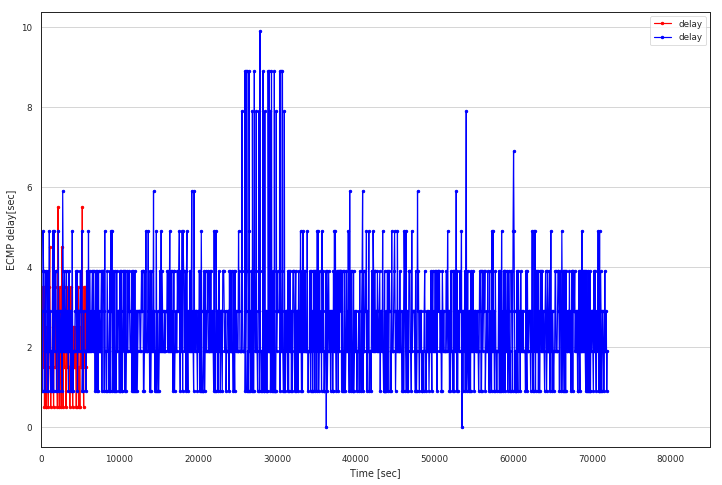

In [10]:
#fig = plt.figure(figsize=(6, 4))
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

d3 = np.loadtxt("Try01_cubic/response_0844/lbnum2.csv",usecols=(0,3), delimiter=',', unpack=True, skiprows=0)
d4 = np.loadtxt("Try01_cubic/response_1836/lbnum2.csv",usecols=(0,3), delimiter=',', unpack=True, skiprows=0)

ax1.plot(d3[0]-d3[0][0], d3[1],  color='r', ls='-', marker='.', label='delay')
ax1.plot(d4[0]-d4[0][0], d4[1],  color='b', ls='-', marker='.', label='delay')
#ax1.legend(loc=(0.8,0.85))
ax1.legend()
ax1.set_xlim(-10,85000)
#ax1.set_ylim(-1,10.1)
#ax1.set_yticks(np.arange(0, 8.1, 2))
ax1.set_ylabel('ECMP delay[sec]')
ax1.set_xlabel('Time [sec]')
ax1.grid(True,axis='y')
plt.show()

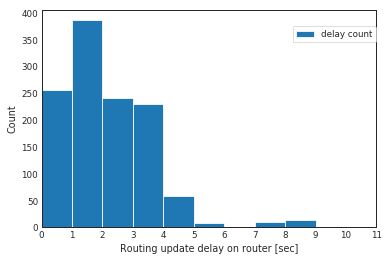

In [11]:


fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)


from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.tick_params(which='major', direction='in', length=5, width='1',top='off')
#ax1.tick_params(which='minor', direction='in', length=5, width='1',top='off')

#d3 = np.loadtxt("Try01_cubic/response_0844/lbnum2.csv",usecols=(0,3), delimiter=',', unpack=True, skiprows=0)
d3 = np.loadtxt("Try01_cubic/response_1836/lbnum2.csv",usecols=(0,3), delimiter=',', unpack=True, skiprows=0)

ax1.hist(d3[1], bins=10, range=(0, 10), label='delay count')
ax1.legend(loc=(0.75,0.85))
ax1.set_xlim(-0,11)
ax1.set_ylabel('Count')
ax1.set_xlabel('Routing update delay on router [sec]')

plt.savefig('ECMP_FIGS/ecmp_delay_histgram_ieice.png', bbox_inches="tight", dpi=300)

plt.show()



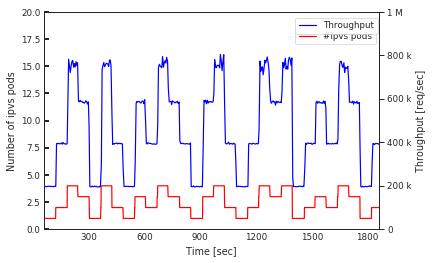

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                    print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

d0 = np.loadtxt("Try01_cubic/response_0844/lbnum.csv",usecols=(0,1,2), delimiter=',', unpack=True, skiprows=0)
d1 = np.loadtxt("Try01_cubic/response_0844/rps.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=0)


fig = plt.figure(figsize=(6, 4))
#fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

ax1.plot(d0[0]-d0[0][0], d0[1],  color='r', ls='-', marker='', label='#ipvs pods')
ax1.set_xlim(60,1860)
#ax1.plot((d0[0]-1540511067)/60, d0[1],  color='r', ls='-', marker='', label='#ipvs pods')
#ax1.set_xlim(1,31)
ax1.set_ylim(0,20)
#ax1.set_yticks(np.arange(0, 10.1, 1))
ax1.set_ylabel('Number of ipvs pods')
ax1.set_xlabel('Time [sec]')

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_minor_locator(MultipleLocator(60))
ax1.xaxis.set_major_locator(MultipleLocator(300))
#ax1.xaxis.set_minor_locator(MultipleLocator(1))
#ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.tick_params(which='minor', direction='in', length=5, width='1',top='off')
ax1.tick_params(which='major', direction='in', length=5, width='2',top='off')

ax2 = ax1.twinx()
ax2.plot(d1[0]-d0[0][0], d1[1],  color='b', ls='-', marker='', label='Throughput')
ax2.set_xlim(60,1860)
#ax2.plot((d1[0]-1540511067)/60, d1[1],  color='b', ls='-', marker='', label='Throughput')
#ax2.set_xlim(1,31)
ax2.set_ylim(0,1000000)
ax2.set_yticks(np.arange(0, 1000001, 200000))
ax2.set_ylabel('Throughput [req/sec]')

ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt))

ax1.legend(loc=(0.75,0.85))
ax2.legend(loc=(0.75,0.9))

#ax1.legend(loc=(0.6,0.75), ncol=2)
#plt.title('Load balancer scalability BBR/CUBIC')

plt.savefig('ECMP_FIGS/ecmp_response_ieice.png', bbox_inches="tight", dpi=300)
plt.show()

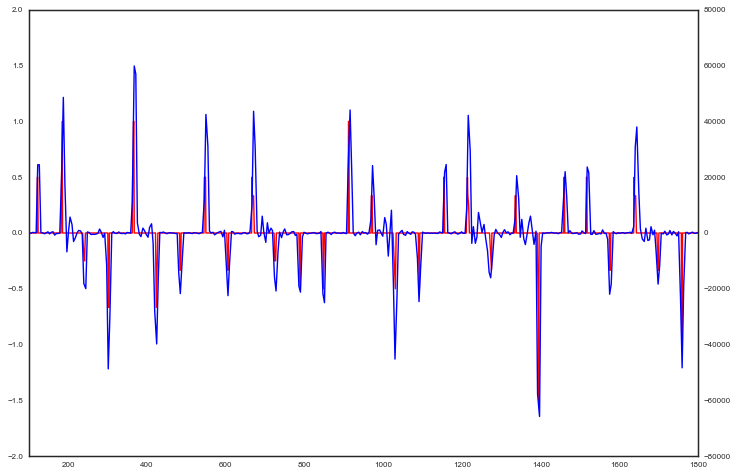

In [83]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

g0=np.gradient(d0[1],np.gradient(d0[0]))
ax1.plot(d0[0]-1540511067, g0,  color='r', ls='-', marker='', label='#pods')
ax1.set_xlim(100,1800)
ax1.set_ylim(-2,2)

ax2 = ax1.twinx()
g1=np.gradient(d1[1],np.gradient(d1[0]))
ax2.plot(d1[0]-1540511067, g1,  color='b', ls='-', marker='', label='#pods')
ax1.set_xlim(100,1800)
#ax2.set_ylim(-2,2)


plt.show()

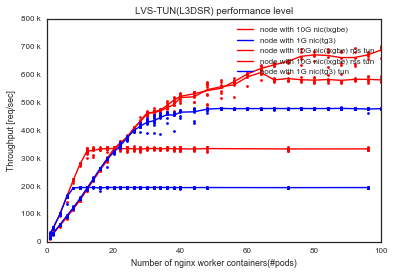

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                    print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)

d0 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
# d5 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
# d6 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
# d7 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
# d8 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
# d9 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

# dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
dt=np.delete(np.concatenate((d0, d1, d2, d3, d4), axis=0), [2,4,6,8],0)
m=np.mean(dt[1::1], axis=0)

cb10g_rps = dt ; mcb10g_rps = m

d0 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
dt=np.delete(np.concatenate((d0, d1, d2, d3, d4), axis=0), [2,4,6,8],0)
m=np.mean(dt[1::1], axis=0)

cb10g_rss = dt ; mcb10g_rss = m

d0 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

cb1t=dt; mcb1t=m

d0 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

cb10g = dt ; mcb10g = m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

cb1=dt; mcb1=m

ax1.plot(cb10g[0], mcb10g ,  color='r', ls='-', marker='', label='node with 10G nic(ixgbe)')
ax1.plot(cb10g[0], cb10g[1::1].T,  color='r', ls='', marker='.')

ax1.plot(cb1[0], mcb1,  color='b', ls='-', marker='', label='node with 1G nic(tg3)')
ax1.plot(cb1[0], cb1[1::1].T,  color='b', ls='', marker='.')


ax1.plot(cb10g_rps[0], mcb10g_rps ,  color='r', ls='-', marker='', label='node with 10G nic(ixgbe) rps tun')
ax1.plot(cb10g_rps[0], cb10g_rps[1::1].T,  color='r', ls='', marker='.')

ax1.plot(cb10g_rss[0], mcb10g_rss ,  color='r', ls='-', marker='', label='node with 10G nic(ixgbe) rss tun')
ax1.plot(cb10g_rss[0], cb10g_rss[1::1].T,  color='r', ls='', marker='.')

ax1.plot(cb1t[0], mcb1t,  color='b', ls='-', marker='', label='node with 1G nic(tg3) tun')
ax1.plot(cb1t[0], cb1t[1::1].T,  color='b', ls='', marker='.')


ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

# ax1.set_yticks(np.arange(0, 400001, 100000))
ax1.set_ylabel('Throughput [req/sec]')
ax1.set_xlabel('Number of nginx worker containers(#pods)')
ax1.legend()
plt.title('LVS-TUN(L3DSR) performance level')

plt.savefig('ECMP_FIGS/10G_ipvs_tun.png', bbox_inches="tight", dpi=300)

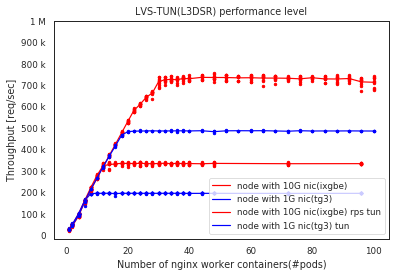

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns
sns.set_style("white")
sns.set_context("paper")

from matplotlib.ticker import FuncFormatter

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                    print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)

d0 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try02_cubic_lvstun/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
# dt=np.delete(np.concatenate((d0, d1, d2, d3, d4), axis=0), [2,4,6,8],0)
# dt=d0
m=np.mean(dt[1::1], axis=0)

cb10gtun = dt ; mcb10gtun = m

d0 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
# d3 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
# d4 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
# d5 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
# d6 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
# d7 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
# d8 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
# d9 = np.loadtxt("Try01_cubic_lvstun/rss_rps_rfs_xps_0_1_1_1/ipvs1_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2), axis=0), [2,4],0)
# dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
# dt=d0
m=np.mean(dt[1::1], axis=0)

cb1gtun=dt; mcb1gtun=m

d0 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_0.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_1.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_2.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_3.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_4.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_5.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_6.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_7.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_8.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try02_cubic/rss_rps_rfs_xps_1_0_0_0/ipvs1_9.csv",usecols=(0, 1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

cb10g = dt ; mcb10g = m

d0 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_0.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d1 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_1.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d2 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_2.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d3 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_3.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d4 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_4.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d5 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_5.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d6 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_6.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d7 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_7.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d8 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_8.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)
d9 = np.loadtxt("Try01_cubic/rss_rps_rfs_xps_0_1_1_1/ipvs1_9.csv",usecols=(0,1), delimiter=',', unpack=True, skiprows=1)

dt=np.delete(np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9), axis=0), [2,4,6,8,10,12,14,16,18],0)
m=np.mean(dt[1::1], axis=0)

cb1=dt; mcb1=m

ax1.plot(cb10g[0], mcb10g ,  color='r', ls='-', marker='', label='node with 10G nic(ixgbe)')
ax1.plot(cb10g[0], cb10g[1::1].T,  color='r', ls='', marker='.')

ax1.plot(cb1[0], mcb1,  color='b', ls='-', marker='', label='node with 1G nic(tg3)')
ax1.plot(cb1[0], cb1[1::1].T,  color='b', ls='', marker='.')


ax1.plot(cb10gtun[0], mcb10gtun ,  color='r', ls='-', marker='', label='node with 10G nic(ixgbe) rps tun')
ax1.plot(cb10gtun[0], cb10gtun[1::1].T,  color='r', ls='', marker='.')

ax1.plot(cb1gtun[0], mcb1gtun,  color='b', ls='-', marker='', label='node with 1G nic(tg3) tun')
ax1.plot(cb1gtun[0], cb1gtun[1::1].T,  color='b', ls='', marker='.')


ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

# ax1.set_xlim(0,60)
ax1.set_yticks(np.arange(0, 1000001, 100000))
ax1.set_ylabel('Throughput [req/sec]')
ax1.set_xlabel('Number of nginx worker containers(#pods)')
ax1.legend()
plt.title('LVS-TUN(L3DSR) performance level')

plt.savefig('ECMP_FIGS/10G_ipvs_tun.png', bbox_inches="tight", dpi=300)